In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
df=pd.read_csv('/content/student_performance.csv')
print(df.shape)
df.sample(10)


(1000, 16)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
35,S1035,21,Female,4.2,1.7,0.0,Yes,84.2,6.5,Good,1,Bachelor,Average,3,No,72.6
94,S1094,22,Female,5.3,1.0,2.2,No,72.6,4.5,Fair,0,High School,Average,8,No,81.3
705,S1705,21,Female,1.0,2.1,1.0,No,79.4,8.7,Fair,1,Bachelor,Average,8,Yes,52.6
344,S1344,19,Male,3.2,1.2,1.2,No,78.6,6.6,Fair,2,High School,Poor,10,Yes,81.7
200,S1200,23,Female,3.5,1.3,0.5,No,89.8,7.8,Fair,2,Bachelor,Good,7,No,81.9
955,S1955,19,Female,2.7,2.8,1.4,Yes,92.2,10.0,Poor,3,High School,Average,8,No,86.9
466,S1466,24,Female,2.8,4.2,0.9,No,90.3,6.1,Good,2,Bachelor,Average,10,No,59.7
501,S1501,21,Female,3.3,1.4,1.0,No,96.8,6.2,Good,0,Bachelor,Poor,5,No,74.9
381,S1381,22,Female,6.2,1.0,3.4,No,82.8,5.9,Poor,4,Bachelor,Good,10,No,100.0
436,S1436,24,Male,4.4,1.8,0.7,No,74.0,7.8,Good,4,High School,Good,2,Yes,78.4


# Data Encoding Using panda's One HotEncoder

In [ ]:
df.drop('student_id',axis=1,inplace=True)
df['diet_quality'].value_counts()

,count
diet_quality,
Fair,437
Good,378
Poor,185


In [ ]:
data_new=pd.get_dummies(df,drop_first=True,dtype=np.int32)
data_new

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,0,0,0,0,0,0,1,0,0,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,0,0,0,1,0,1,0,0,0,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,1,0,0,0,1,1,0,0,1,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,0,0,0,1,0,1,1,0,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,0,0,0,0,0,1,0,1,0,1
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,0,1,0,1,1,0,0,0,1
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,1,0,0,1,0,0,0,1,0,1
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1,0,1,0,0,0,0,0,0,0


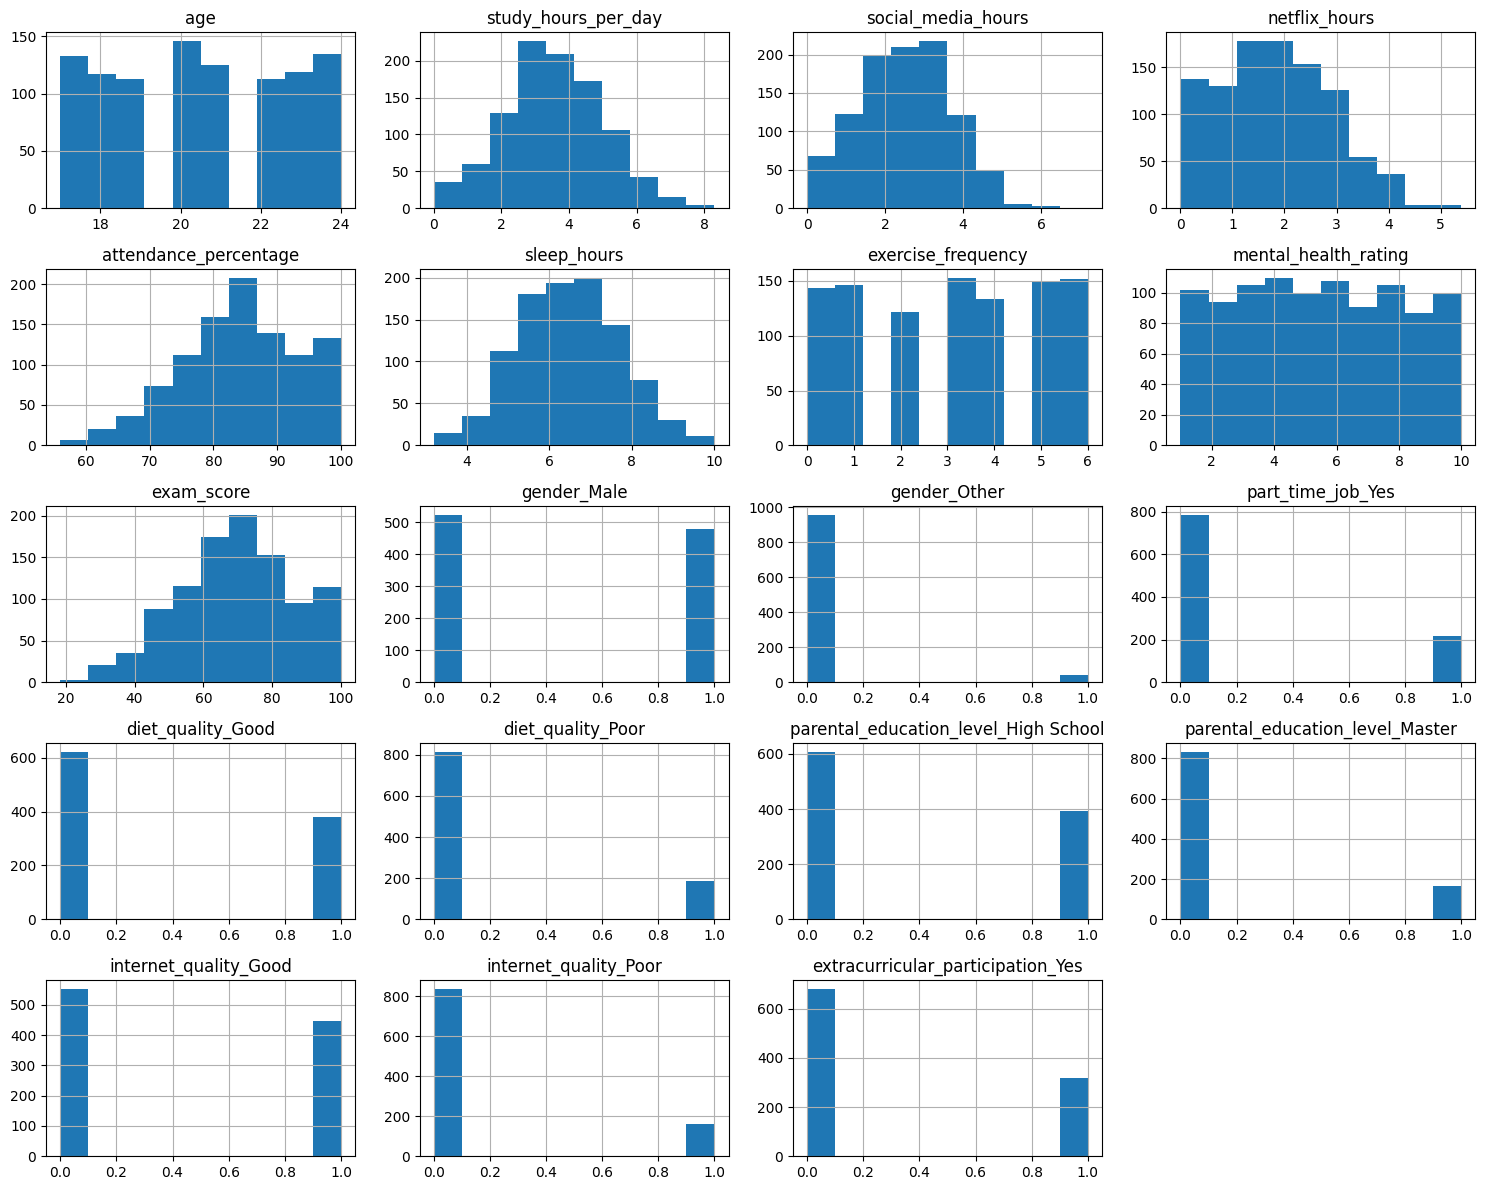

In [ ]:
data_new.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()


<Axes: >

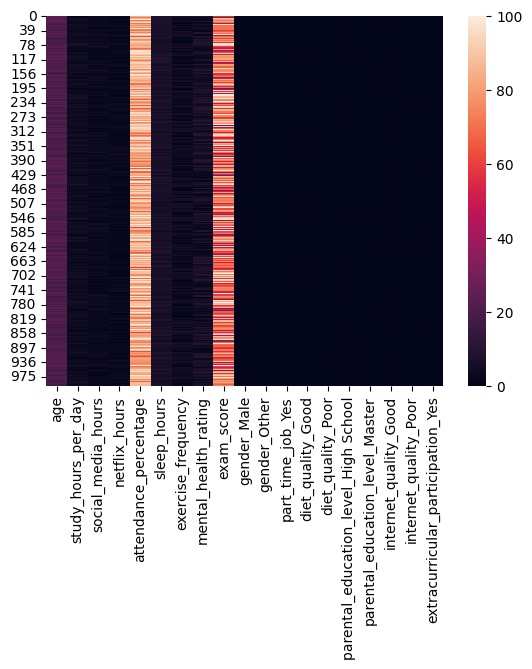

In [ ]:
sns.heatmap(data_new)

In [ ]:
data_new.corr()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907,0.025562,0.015309,-0.011680,-0.002006,-0.010192,-0.046363,-0.004842,0.029987,0.025087,-0.004993
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419,-0.025634,0.008814,-0.029133,-0.003565,-0.066777,0.000643,0.009009,0.001514,-0.026465,-0.003264
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733,-0.004995,0.015609,0.021224,0.026084,0.011390,0.028569,0.007508,0.046071,-0.010402,-0.018597
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779,0.000937,0.046266,0.009207,0.002406,0.021463,0.026835,-0.007959,0.030498,-0.036854,-0.005125
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836,-0.024108,-0.001184,-0.041771,-0.061024,0.033262,-0.026410,-0.072545,-0.021596,0.049536,-0.017778
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683,-0.024235,0.057166,0.001645,-0.024224,0.034733,-0.021355,0.001298,-0.002190,-0.006988,0.027693
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107,0.068207,-0.009269,-0.021679,0.024576,0.020647,0.029885,-0.039751,-0.030575,0.027076,-0.005681
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523,-0.006279,0.002810,0.013539,0.056837,0.019880,0.011014,-0.087748,-0.056385,0.019114,-0.004741
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000,-0.013191,0.012976,-0.026608,-0.010857,-0.041602,-0.002583,-0.040177,-0.050804,0.003016,0.000881
gender_Male,0.025562,-0.025634,-0.004995,0.000937,-0.024108,-0.024235,0.068207,-0.006279,-0.013191,1.000000,-0.199963,0.031409,0.019382,-0.027044,0.028773,0.007198,-0.033097,0.074586,-0.007248


In [ ]:
data_new.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score', 'gender_Male', 'gender_Other',
       'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_Yes'],
      dtype='object')

# Data Standarization

In [ ]:
x=data_new.drop('exam_score',axis=1)

In [ ]:
y=data_new['exam_score']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(700, 18)

In [ ]:
scaler= StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Model : LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)

# Errors :

In [ ]:
print('The MSE is : ',mean_squared_error(y_test,y_pred))

The MSE is :  28.739364099659124


In [ ]:
print('the r2_score is : ',r2_score(y_test,y_pred))

the r2_score is :  0.8965321985470139


In [ ]:
print('the mean_absolute_error is : ',mean_absolute_error(y_test,y_pred))

the mean_absolute_error is :  4.269365434478839


# Slopes and Intercept:

In [ ]:
print("The Slopes are : ",model.coef_)

The Slopes are :  [ 1.39366064e-01  1.40326148e+01 -3.20320826e+00 -2.60768367e+00
  1.35350579e+00  2.47073161e+00  2.58545751e+00  5.53707025e+00
  1.56244067e-01  1.53940720e-01  8.04167350e-03 -4.82983290e-01
 -2.34401887e-01 -2.32979182e-01 -2.26444712e-02 -7.45356618e-02
 -3.22057694e-02 -3.66444965e-02]


In [ ]:
print("The Intercept is : ",model.intercept_)

The Intercept is :  69.87957142857142


# Plot

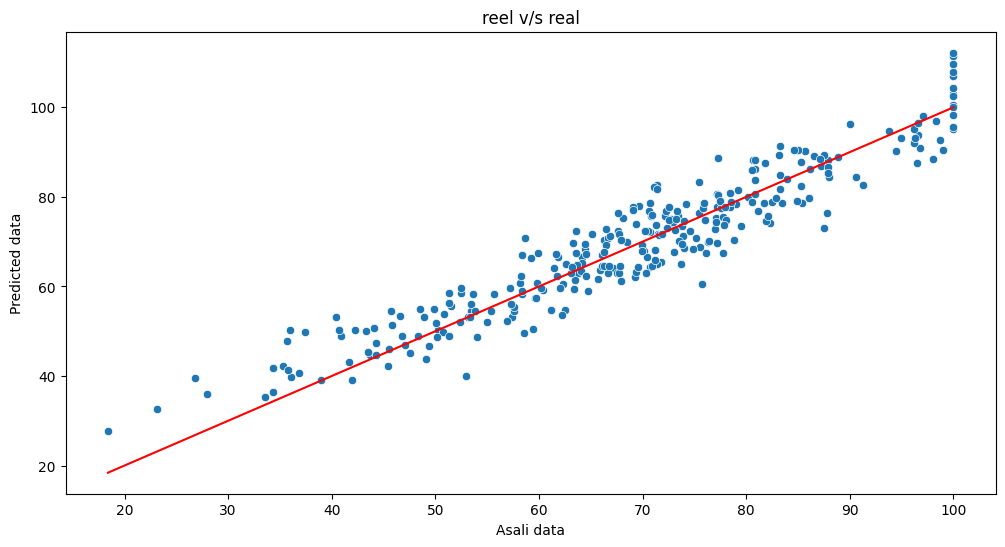

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.title('reel v/s real')
plt.xlabel('Asali data')
plt.ylabel('Predicted data')
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')
plt.show()

# Data Augmentaion


In [ ]:
df=pd.read_csv('/content/student_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
num_features=['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

In [ ]:
aug_data=df[num_features].copy()

In [ ]:
#Gaussian Noise:
for col in num_features:
  std_dev=df[col].std()*0.05
  noise=np.random.normal(scale=std_dev,loc=0,size=df.shape[0])
  aug_data[col]=df[col]+noise

In [ ]:
aug_data['exam_score']=df['exam_score']
aug_data.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,23.070423,0.000892,1.214941,1.035813,85.109706,7.913306,5.921664,8.062781,56.2
1,20.037529,6.918745,2.836040,2.280426,98.380978,4.589891,6.059673,8.200998,100.0
2,20.830226,1.353642,3.079551,1.322091,95.570633,7.981563,1.139569,0.828807,34.3
3,23.114127,0.996793,3.937564,1.078085,70.167633,9.229663,4.122788,1.223861,26.8
4,18.930142,4.918220,4.479732,0.494306,90.972362,5.028638,3.040997,1.152628,66.4


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(aug_data.iloc[:,0:8],aug_data.iloc[:,-1],test_size=0.3,random_state=42)
x_train

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
541,17.942963,4.191908,3.807135,3.465320,85.501373,5.439324,1.928013,4.791856
440,17.083981,3.124237,0.156004,0.883918,100.460602,6.820481,4.113881,4.886706
482,21.142317,3.375057,1.570777,0.650772,79.889947,7.181542,0.971290,1.378694
422,22.061731,1.950604,2.297870,3.894852,66.094888,4.086342,2.951908,2.054561
778,24.008998,5.086675,0.541017,1.411533,88.293559,4.082429,4.014705,8.091158
...,...,...,...,...,...,...,...,...
106,22.045316,3.397526,0.387241,0.772228,83.029922,8.961312,5.898240,4.183899
270,22.052530,3.867166,3.225058,2.229356,96.997008,5.926157,3.984407,2.845477
860,20.100682,3.667090,3.896654,4.254241,99.969664,8.347407,0.984972,7.742518
435,23.689478,2.029935,0.039742,3.050970,74.039112,6.337701,5.867419,3.012914


In [ ]:
y_train

,exam_score
541,67.4
440,76.1
482,67.0
422,29.5
778,100.0
...,...
106,82.3
270,63.0
860,65.6
435,58.3


In [ ]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [ ]:
model2.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model2.predict(x_test)

In [ ]:
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test,y_pred):.2f}")
print(f"R² Score: {r2_score(y_test,y_pred):.2f}")
print('the mean_absolute_error is : ',mean_absolute_error(y_test,y_pred))

Mean Squared Error (MSE): 28.27
R² Score: 0.90
the mean_absolute_error is :  4.248207694345961


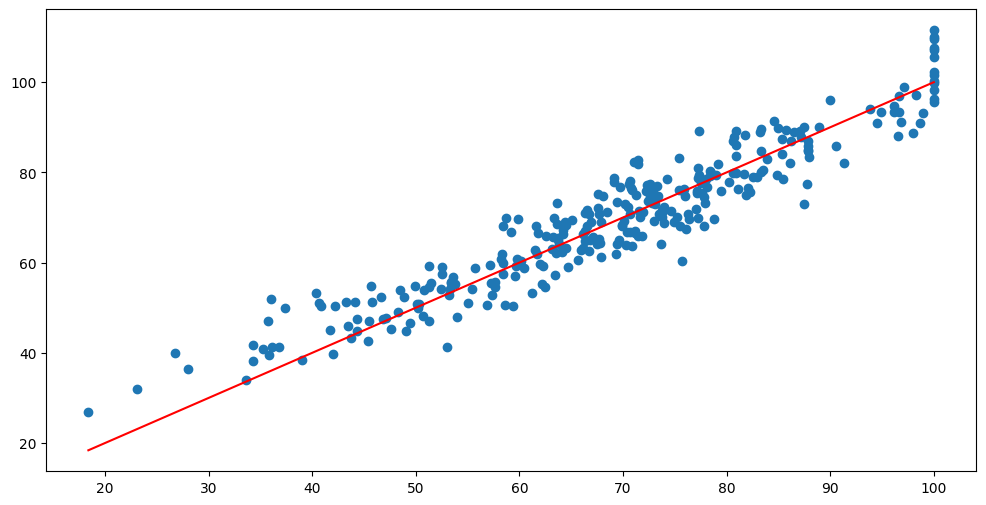

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')

# So Now it can be said that data augmentaion can be a important factor to train the model because without applyling the Data Augmentation but also  use the One_Hot_encoding And Standarization  we get the errors like    
'The MSE is :  28.739364099659124'
'the r2_score is :  0.8965321985470139'

But After Applying it we get :
         'Mean Squared Error (MSE): 29.09'
'R² Score: 0.90'...